In [1]:
from chebGreen import ChebGreen
import numpy as np
import matplotlib.pyplot as plt

from chebGreen.chebpy2 import Quasimatrix
from chebGreen.chebpy2.chebpy import chebfun
from chebGreen.chebpy2 import Chebfun2

# %env TF_MLC_LOGGING=1
# %env TF_CPP_MIN_LOG_LEVEL=2

In [2]:
Theta = [0.5, 0.6, 0.8] # 0.5 - 1.5
domain = [-2,2,-2,2]
generateData = True
script = "generate_example"
example = "schrodinger"
dirichletBC = True
schrodinger = ChebGreen(Theta, domain, generateData, script, example, dirichletBC)

Generating dataset for example 'schrodinger'
Dataset found for Theta = 0.50. Skipping dataset generation.
### Example = schrodinger @ theta = 0.6 ###
Number of samples: 100
Length scale: 0.01
Nf: 500
Nu: 500
Noise: 0%
---------------------------------------
Step = 1/100
Step = 2/100
Step = 3/100
Step = 4/100
Step = 5/100
Step = 6/100
Step = 7/100
Step = 8/100
Step = 9/100
Step = 10/100
Step = 11/100
Step = 12/100
Step = 13/100
Step = 14/100
Step = 15/100
Step = 16/100
Step = 17/100
Step = 18/100
Step = 19/100
Step = 20/100
Step = 21/100
Step = 22/100
Step = 23/100
Step = 24/100
Step = 25/100
Step = 26/100
Step = 27/100
Step = 28/100
Step = 29/100
Step = 30/100
Step = 31/100
Step = 32/100
Step = 33/100
Step = 34/100
Step = 35/100
Step = 36/100
Step = 37/100
Step = 38/100
Step = 39/100
Step = 40/100
Step = 41/100
Step = 42/100
Step = 43/100
Step = 44/100
Step = 45/100
Step = 46/100
Step = 47/100
Step = 48/100
Step = 49/100
Step = 50/100
Step = 51/100
Step = 52/100
Step = 53/100
Step = 54

CPU times: user 24.2 s, sys: 36.3 s, total: 1min
Wall time: 16.4 s


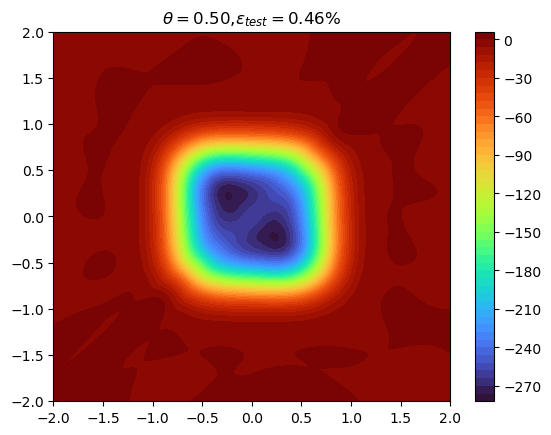

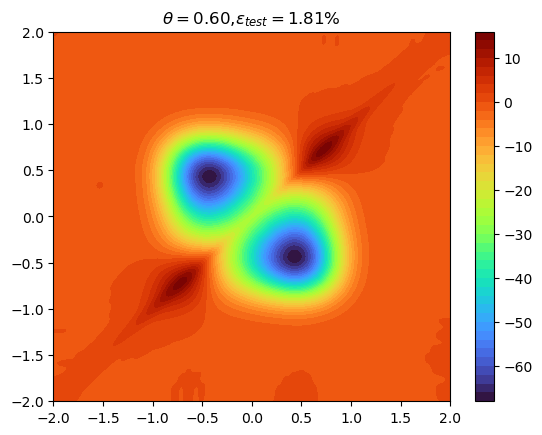

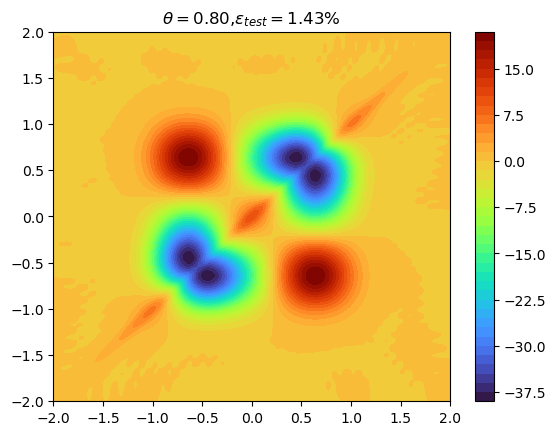

In [3]:
%%time
for t in Theta:
    fig = plt.figure()
    schrodinger.G[t].plot(fig = fig)
    error = schrodinger.computeEmpiricalError(t)
    plt.title(f"$\\theta = {{{t:4.2f}}}$,$\\epsilon_{{test}} = {{{error*100:4.2f}}}\%$")

In [4]:
%%time
u,s,v = schrodinger.G[0.5].cdr()

CPU times: user 362 µs, sys: 1.89 ms, total: 2.26 ms
Wall time: 4.37 ms


In [6]:
q, r = u.qr()

In [8]:
np.diag()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [6]:
%%time
u,s,v = schrodinger.G[0.5].svd()

CPU times: user 1.91 s, sys: 5.57 s, total: 7.48 s
Wall time: 939 ms


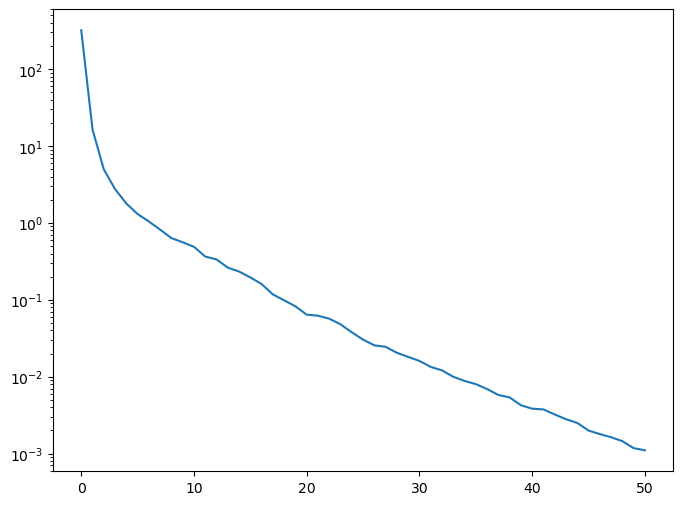

In [7]:
fig = plt.figure(figsize = (8,6))
plt.semilogy(s)

(-1.0, 1.0)

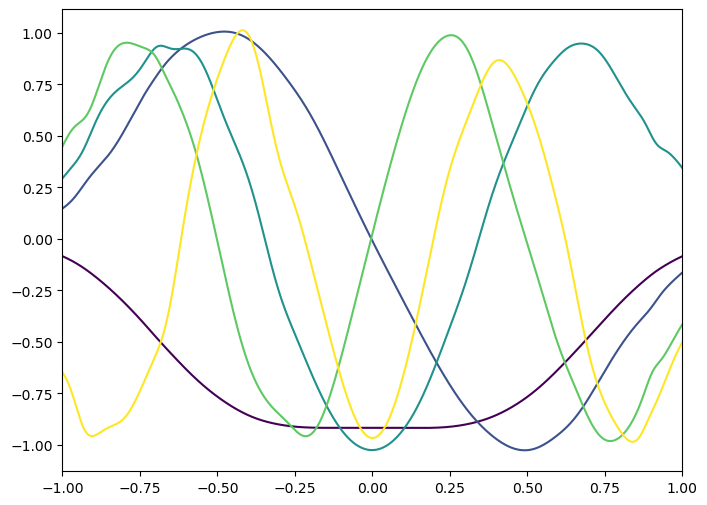

In [8]:
# i = slice(10,20)
i = slice(0,5)
# i = 16
fig = plt.figure(figsize = (8,6))
u[:,i].plot(fig = fig)
# print(np.max(u[:,i].vscale))
# plt.title(f'First {i+1} left singular functions for a Laplacian')
plt.xlim([-1,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

In [9]:
%%time
theta_ = 1.5
Ginterp, Ninterp = schrodinger.generateNewModel(theta_)

CPU times: user 18.4 s, sys: 40.5 s, total: 58.9 s
Wall time: 11 s


In [10]:
Ginterp

chebfun2 object
     domain       rank               corner values
[-2.0,2.0] x [-2.0,2.0]     51       [-0.000 -0.000 0.000 0.000]
vertical scale = 134.790827

In [11]:
%%time
u,s,v = Ginterp.svd()

CPU times: user 2.95 s, sys: 7.69 s, total: 10.6 s
Wall time: 1.9 s


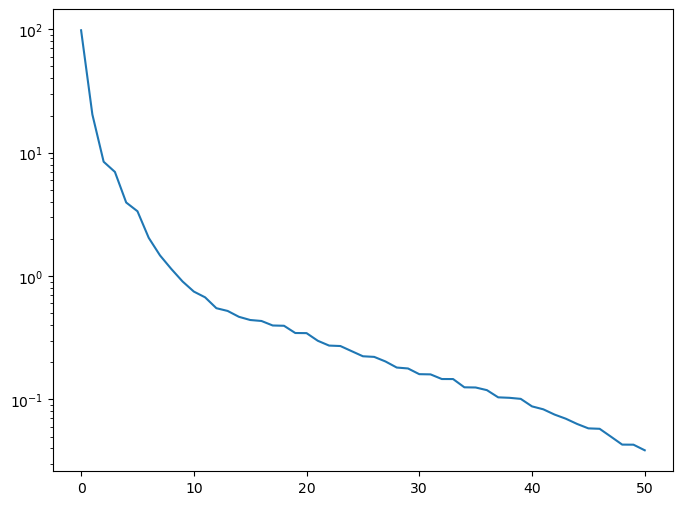

In [12]:
fig = plt.figure(figsize = (8,6))
plt.semilogy(s)

In [13]:
validation = ChebGreen([theta_], domain, generateData, script, example, dirichletBC)

Generating dataset for example 'schrodinger'
### Example = schrodinger @ theta = 1.5 ###
Number of samples: 100
Length scale: 0.01
Nf: 500
Nu: 500
Noise: 0%
---------------------------------------
Step = 1/100
Step = 2/100
Step = 3/100
Step = 4/100
Step = 5/100
Step = 6/100
Step = 7/100
Step = 8/100
Step = 9/100
Step = 10/100
Step = 11/100
Step = 12/100
Step = 13/100
Step = 14/100
Step = 15/100
Step = 16/100
Step = 17/100
Step = 18/100
Step = 19/100
Step = 20/100
Step = 21/100
Step = 22/100
Step = 23/100
Step = 24/100
Step = 25/100
Step = 26/100
Step = 27/100
Step = 28/100
Step = 29/100
Step = 30/100
Step = 31/100
Step = 32/100
Step = 33/100
Step = 34/100
Step = 35/100
Step = 36/100
Step = 37/100
Step = 38/100
Step = 39/100
Step = 40/100
Step = 41/100
Step = 42/100
Step = 43/100
Step = 44/100
Step = 45/100
Step = 46/100
Step = 47/100
Step = 48/100
Step = 49/100
Step = 50/100
Step = 51/100
Step = 52/100
Step = 53/100
Step = 54/100
Step = 55/100
Step = 56/100
Step = 57/100
Step = 58/100


Text(0.5, 1.0, 'Interpolated Model $\\theta = {1.50}$,$\\epsilon_{test} = {440.52}\\%$')

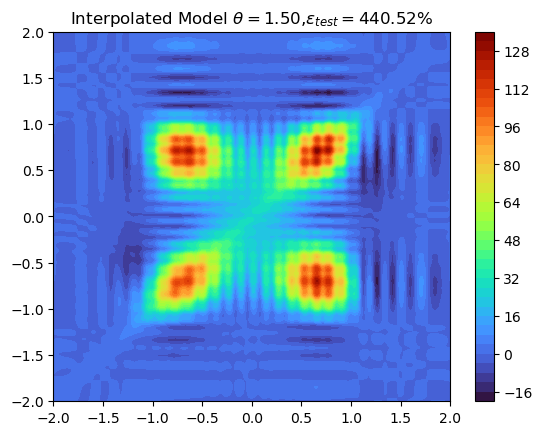

In [14]:
fig = plt.figure()
Ginterp.plot(fig = fig)
error = schrodinger.computeEmpiricalError(theta_)
# error = 0
plt.title(f"Interpolated Model $\\theta = {{{theta_:4.2f}}}$,$\\epsilon_{{test}} = {{{error*100:4.2f}}}\%$")

Text(0.5, 1.0, 'Validation Model $\\theta = {0.70}$,$\\epsilon_{test} = {0.00}\\%$')

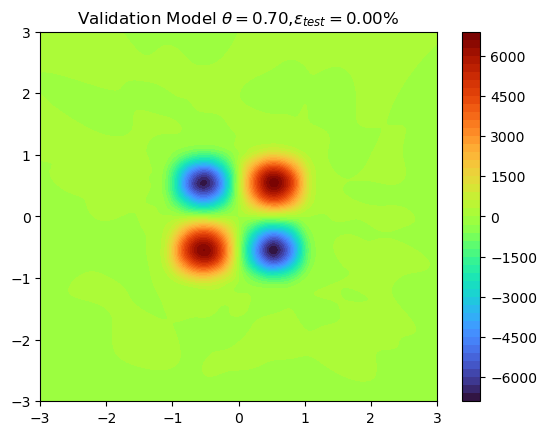

In [18]:
fig = plt.figure()
validation.G[theta_].plot(fig = fig)
# error = validation.computeEmpiricalError(theta_)
plt.title(f"Validation Model $\\theta = {{{theta_:4.2f}}}$,$\\epsilon_{{test}} = {{{error*100:4.2f}}}\%$")

In [16]:
def compareGreen1D(interpModel, exactModel, vmin = None, vmax = None):
    domain = interpModel.domain
    xx = np.linspace(domain[2],domain[3],2000)
    yy = np.linspace(domain[0],domain[1],2000)
    x, s = np.meshgrid(xx,yy)
    
    if vmin is None:
        vmin = min(interpModel.min,exactModel.min)
    if vmax is None:
        vmax = max(interpModel.max,exactModel.max)
        
    plt.figure(figsize = (16,6))
    plt.subplot(121)
    
    GInterp = interpModel[x,s]
    
    levels = np.linspace(vmin, vmax, 50, endpoint = True)
    ticks = np.linspace(vmin, vmax, 10, endpoint=True)
    
    surf = plt.contourf(x, s, GInterp, levels = levels, cmap = 'turbo', vmin = vmin, vmax = vmax)
    plt.gca().set_aspect('equal', adjustable='box')
    cbar = plt.colorbar(ticks = ticks, fraction = 0.046, pad = 0.04)
    cbar.ax.set_yticklabels(["{:4.2f}".format(i) for i in ticks])
    plt.xlabel('$x$', fontsize = 11)
    plt.ylabel('$s$', rotation='horizontal', labelpad=10, fontsize = 11)
    plt.title("Interpolated", fontsize = 14)
    
    GExact = exactModel[x,s]
    
    plt.subplot(122)
    plt.gca().set_aspect('equal', adjustable='box')
    surf = plt.contourf(x, s, GExact, levels = levels, cmap = 'turbo', vmin = vmin, vmax = vmax)
    cbar = plt.colorbar(ticks = ticks, fraction = 0.046, pad = 0.04)
    cbar.ax.set_yticklabels(["{:4.2f}".format(i) for i in ticks])
    plt.xlabel('x', fontsize = 11)
    plt.ylabel('s', rotation='horizontal', labelpad=10, fontsize = 11)
    plt.title("Data", fontsize = 14)

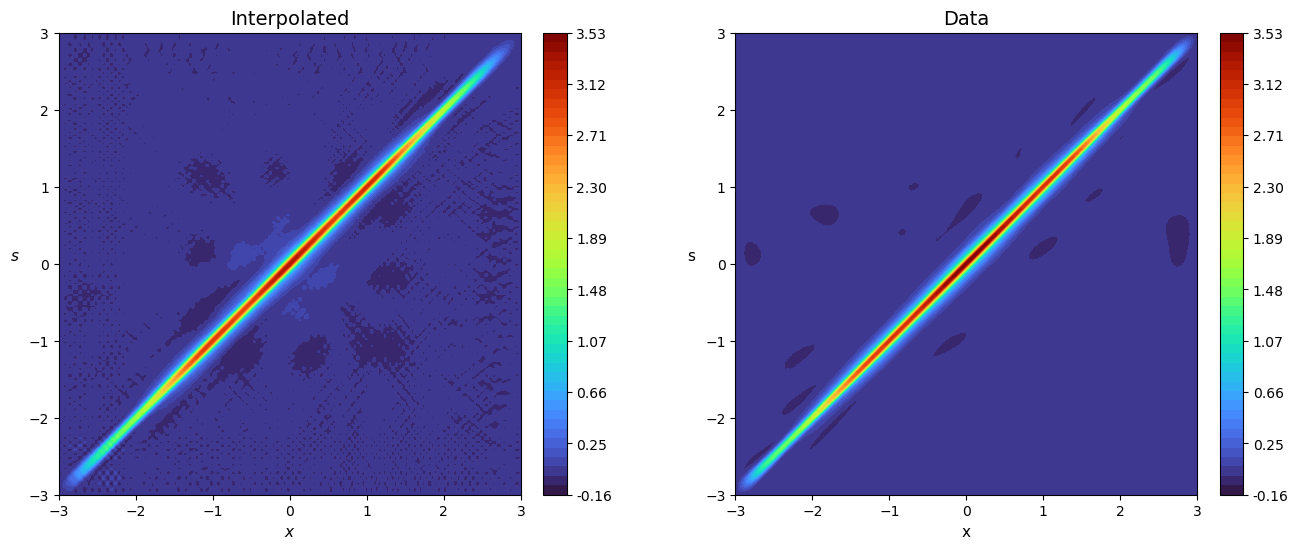

In [17]:
compareGreen1D(Ginterp,validation.G[theta_])